# 2018 Yellow Taxi Trip Data Analysis

- Read taxi-sample and shape files
- Data cleaning (removing null values, trip duration 0 etc.)

In [1]:
import pandas as pd
import numpy as np
import shapefile
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import seaborn as sns

In [2]:
taxiSample = pd.read_csv("data/taxi-sample.csv")
taxiSample[105:110]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
105,2,03/12/2019 11:12:48 PM,03/12/2019 11:23:38 PM,1,1.10,1,N,137,113,1,8.5,0.0,0.5,1.86,0.0,0.3,11.16
106,2,03/07/2019 06:25:03 AM,03/07/2019 03:25:31 PM,1,8.66,1,N,163,54,1,38.0,0.0,0.5,7.76,0.0,0.3,46.56
107,2,03/04/2019 12:35:59 PM,03/04/2019 01:07:03 PM,2,5.52,1,N,50,179,1,23.0,0.0,0.5,0.00,0.0,0.3,23.80
108,2,03/04/2019 12:13:56 AM,03/04/2019 12:32:39 AM,5,11.94,1,N,70,265,2,32.5,0.0,0.5,0.00,0.0,0.3,33.30
109,2,03/03/2019 03:27:20 AM,03/03/2019 12:01:14 PM,1,6.37,1,N,170,13,1,27.0,0.0,0.5,4.50,0.0,0.3,32.30


In [3]:
%%time
taxiSample['tpep_pickup_datetime'] = pd.to_datetime(taxiSample['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
taxiSample['tpep_dropoff_datetime'] = pd.to_datetime(taxiSample['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

CPU times: user 7.54 s, sys: 47.8 ms, total: 7.59 s
Wall time: 7.62 s


In [4]:
taxiSample[105:110]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
105,2,2019-03-12 23:12:48,2019-03-12 23:23:38,1,1.10,1,N,137,113,1,8.5,0.0,0.5,1.86,0.0,0.3,11.16
106,2,2019-03-07 06:25:03,2019-03-07 15:25:31,1,8.66,1,N,163,54,1,38.0,0.0,0.5,7.76,0.0,0.3,46.56
107,2,2019-03-04 12:35:59,2019-03-04 13:07:03,2,5.52,1,N,50,179,1,23.0,0.0,0.5,0.00,0.0,0.3,23.80
108,2,2019-03-04 00:13:56,2019-03-04 00:32:39,5,11.94,1,N,70,265,2,32.5,0.0,0.5,0.00,0.0,0.3,33.30
109,2,2019-03-03 03:27:20,2019-03-03 12:01:14,1,6.37,1,N,170,13,1,27.0,0.0,0.5,4.50,0.0,0.3,32.30


In [5]:
print("Train dataset start date: ", min(taxiSample["tpep_pickup_datetime"]))
print("Train dataset end date: ", max(taxiSample["tpep_dropoff_datetime"]))

Train dataset start date:  2018-12-27 00:05:14
Train dataset end date:  2084-11-04 12:47:41


In [6]:
print(taxiSample.shape)

(1048576, 17)


### Checking if there is any null value in the dataset

In [7]:
taxiSample.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool

### Removing rows with trip distance 0 or less

In [8]:
trip_dist = taxiSample[taxiSample.trip_distance <= 0]
trip_dist.shape

(8463, 17)

In [9]:
taxiSample = taxiSample[taxiSample.trip_distance > 0]
taxiSample.shape

(1040113, 17)

### Removing rows with passenger count 0 or less

In [10]:
pass_count = taxiSample[taxiSample.passenger_count <= 0]
pass_count.shape

(15039, 17)

In [11]:
taxiSample = taxiSample[taxiSample.passenger_count > 0]
taxiSample.shape

(1025074, 17)

### Removing duplicate rows

In [12]:
duplicate = taxiSample[taxiSample.duplicated()]
duplicate.shape

(21, 17)

In [13]:
taxiSample.drop_duplicates(keep='first', inplace=True)
taxiSample.shape

(1025053, 17)

### Removing rows with same pickup and dropoff time

In [14]:
same_pick_drop = taxiSample[taxiSample.tpep_pickup_datetime==taxiSample.tpep_dropoff_datetime]
same_pick_drop.shape

(46, 17)

In [15]:
taxiSample = taxiSample[taxiSample.tpep_pickup_datetime!=taxiSample.tpep_dropoff_datetime]
taxiSample.shape

(1025007, 17)

In [16]:
taxiZones = shapefile.Reader("data/taxi_zones/taxi_zones.shp")
fields_name = [field[0] for field in taxiZones.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))

attributes = taxiZones.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]
print(shp_attr[:2])

[{'OBJECTID': 1, 'Shape_Leng': 0.116357453189, 'Shape_Area': 0.0007823067885, 'zone': 'Newark Airport', 'LocationID': 1, 'borough': 'EWR'}, {'OBJECTID': 2, 'Shape_Leng': 0.43346966679, 'Shape_Area': 0.00486634037837, 'zone': 'Jamaica Bay', 'LocationID': 2, 'borough': 'Queens'}]


In [17]:
def get_lat_lon(taxiZones):
    content = []
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        
        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [18]:
df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(taxiZones).set_index("LocationID"), on="LocationID")
df_loc.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,longitude,latitude
0,1,0.116357,0.000782,Newark Airport,1,EWR,9.366817e+05,190522.130278
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,1.033536e+06,161853.982300
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,1.027136e+06,254730.010849
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,9.904240e+05,203100.040432
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,9.321332e+05,139954.541936


In [19]:
boroughs = df_loc['borough'].unique()
print(boroughs)

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn']


In [20]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [21]:
def draw_region_map(ax, taxiZones, heat={}):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)    
    
    reg_list={'EWR':1, 'Queens':2, 'Bronx':3, 'Manhattan':4, 'Staten Island':5, 'Brooklyn':6}
    reg_x = {'EWR':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'Staten Island':[], 'Brooklyn':[]}
    reg_y = {'EWR':[], 'Queens':[], 'Bronx':[], 'Manhattan':[], 'Staten Island':[], 'Brooklyn':[]}
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=math.sqrt(min(heat.values())), vmax=math.sqrt(max(heat.values()))) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        #sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        #sm.set_array([])
        #plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8), \
        #             boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    ax.set_facecolor(ocean)
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        reg_name = rec[shp_dic['borough']]
        
        if len(heat) == 0:
            norm = mpl.colors.Normalize(vmin=1,vmax=6) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
            cm=plt.get_cmap('Pastel1')
            R,G,B,A = cm(norm(reg_list[reg_name]))
            col = [R,G,B]
        else:
            R,G,B,A = cm(norm(math.sqrt(heat[reg_name])))
            col = [R,G,B]
            
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
                
        reg_x[reg_name].append((shape.bbox[0]+shape.bbox[2])/2)
        reg_y[reg_name].append((shape.bbox[1]+shape.bbox[3])/2)
        
    for k in reg_list:
        if len(heat)==0:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), k, horizontalalignment='center', verticalalignment='center',
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)     
        else:
            plt.text(np.mean(reg_x[k]), np.mean(reg_y[k]), "{}\n({}K)".format(k, heat[k]/1000), horizontalalignment='center', 
                     verticalalignment='center',bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12)       

    # display
    limits = get_boundaries(taxiZones)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

In [47]:
def draw_zone_map(ax, taxiZones, heat={}, text=[], arrows=[]):
    continent = [25/256, 67/256, 90/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)
    
    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))
    
    for sr in taxiZones.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]
        
        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)
        
        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')            
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))
    
    # display
    limits = get_boundaries(taxiZones)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

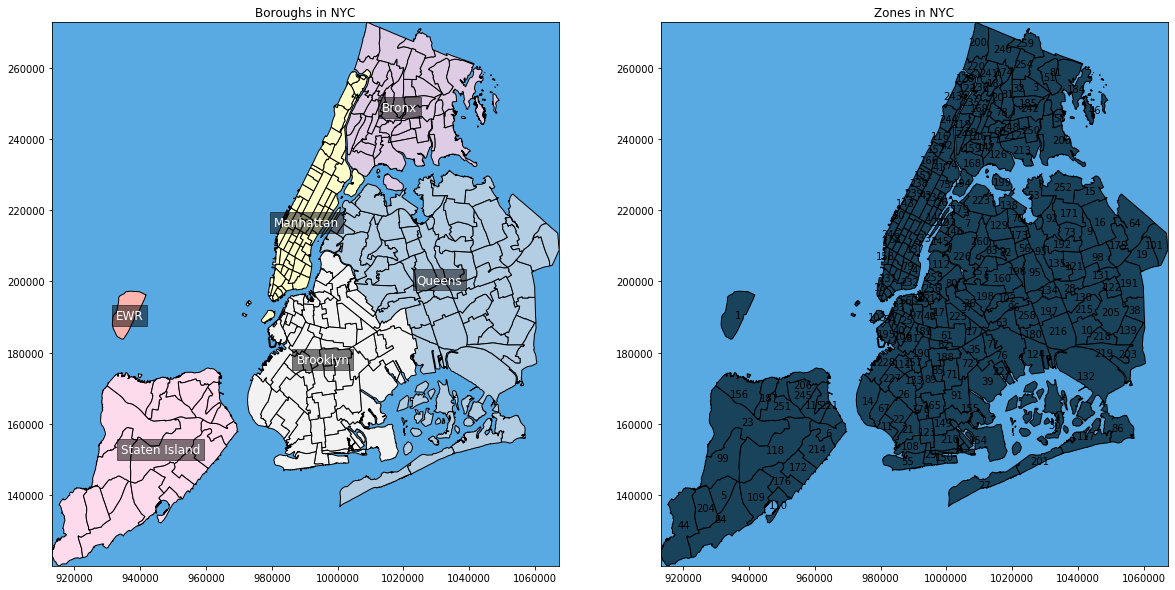

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = plt.subplot(1, 2, 1)
ax.set_title("Boroughs in NYC")
draw_region_map(ax, taxiZones)
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, taxiZones)

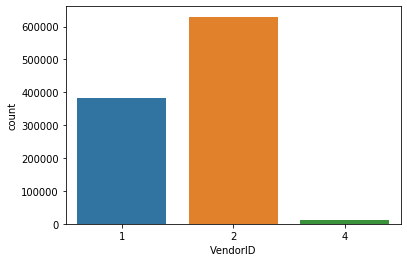

In [24]:
sns.countplot(x="VendorID", data=taxiSample)

In [25]:
taxiSample.groupby('VendorID')['VendorID'].count()

VendorID
1    382907
2    630062
4     12038
Name: VendorID, dtype: int64

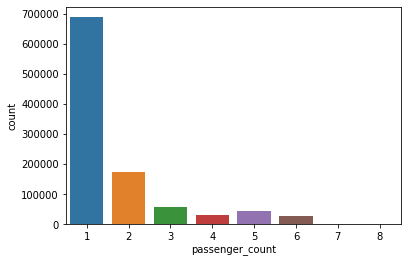

In [26]:
sns.countplot(x="passenger_count", data=taxiSample)

In [27]:
taxiSample.groupby('passenger_count')['passenger_count'].count()

passenger_count
1    688171
2    174912
3     56169
4     32720
5     45356
6     27674
7         2
8         3
Name: passenger_count, dtype: int64

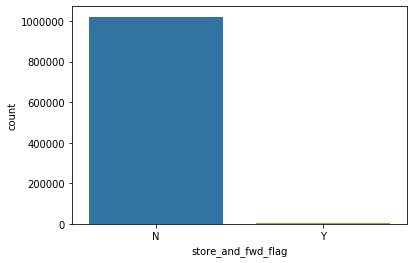

In [28]:
sns.countplot(x="store_and_fwd_flag", data=taxiSample)

In [29]:
taxiSample.groupby('store_and_fwd_flag')['store_and_fwd_flag'].count()

store_and_fwd_flag
N    1021299
Y       3708
Name: store_and_fwd_flag, dtype: int64

In [30]:
temp_flag = taxiSample[taxiSample.store_and_fwd_flag=='N']
(temp_flag.shape[0]*100) / taxiSample.shape[0]  # percentage of record that are N

99.6382463729516

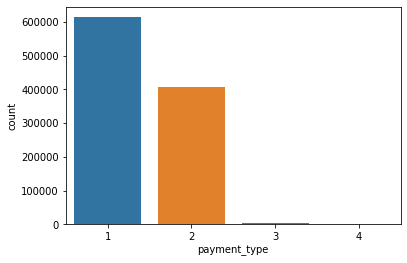

In [31]:
sns.countplot(x="payment_type", data=taxiSample)

In [32]:
taxiSample.groupby('payment_type')['payment_type'].count()

payment_type
1    613210
2    405372
3      4590
4      1835
Name: payment_type, dtype: int64

In [33]:
taxiSample["pickup_weekday"] = taxiSample.tpep_pickup_datetime.dt.weekday_name
taxiSample["pickup_hour"] = taxiSample.tpep_pickup_datetime.dt.hour
taxiSample["pickup_month"] = taxiSample.tpep_pickup_datetime.dt.month

In [34]:
taxiSample["dropoff_weekday"] = taxiSample.tpep_dropoff_datetime.dt.weekday_name
taxiSample["dropoff_hour"] = taxiSample.tpep_dropoff_datetime.dt.hour
taxiSample["dropoff_month"] = taxiSample.tpep_dropoff_datetime.dt.month

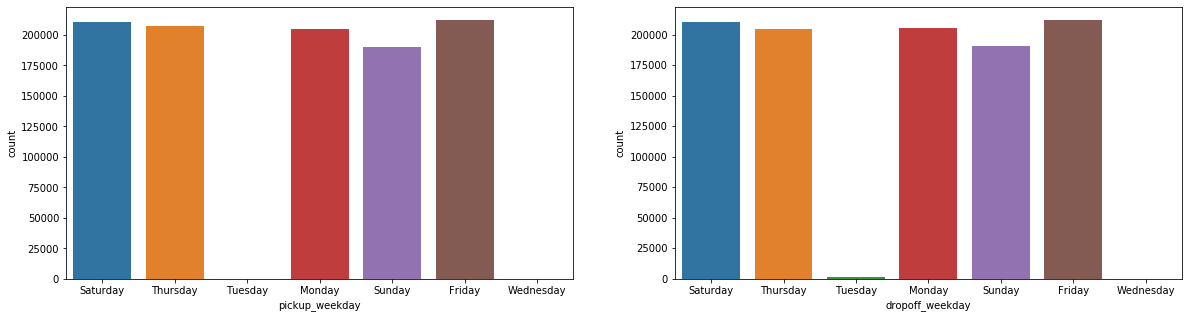

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_weekday", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_weekday", data=taxiSample, ax=ax[1])
plt.show()

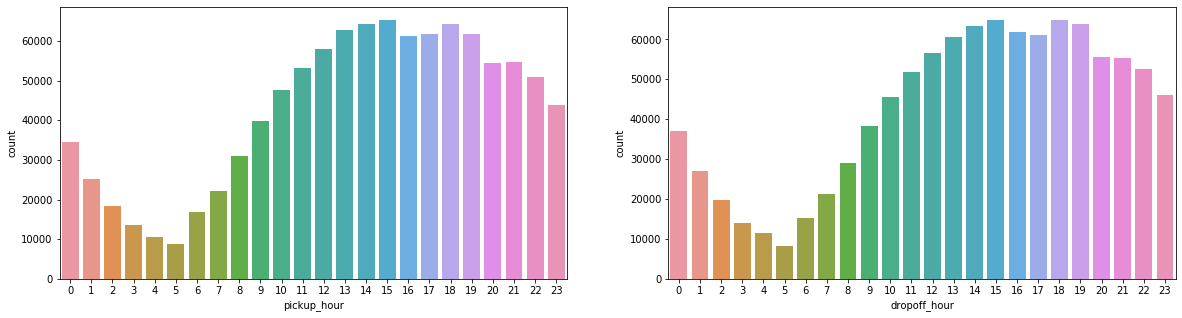

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_hour", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_hour", data=taxiSample, ax=ax[1])
plt.show()

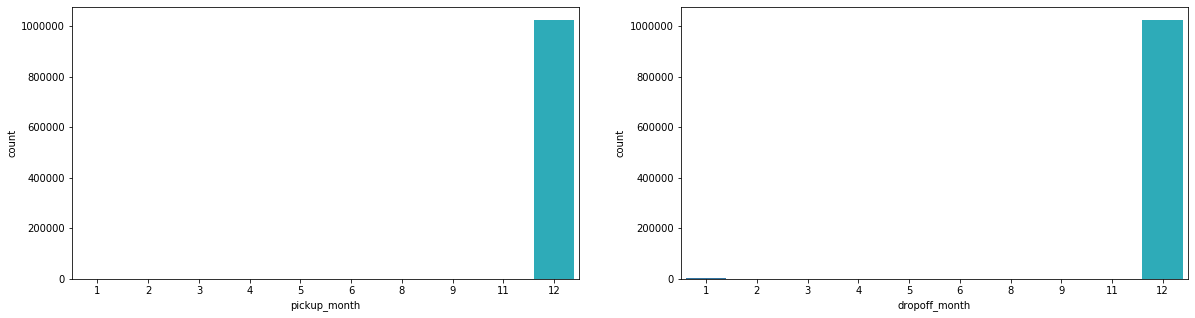

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="pickup_month", data=taxiSample, ax=ax[0])
sns.countplot(x="dropoff_month", data=taxiSample, ax=ax[1])
plt.show()

In [39]:
taxiSample['trip_duration'] = (taxiSample.tpep_dropoff_datetime - taxiSample.tpep_pickup_datetime).dt.total_seconds()

In [40]:
taxiSample.trip_duration.describe()

count    1.025007e+06
mean     1.115711e+03
std      4.986613e+03
min      1.000000e+00
25%      3.720000e+02
50%      6.430000e+02
75%      1.084000e+03
max      8.639400e+04
Name: trip_duration, dtype: float64

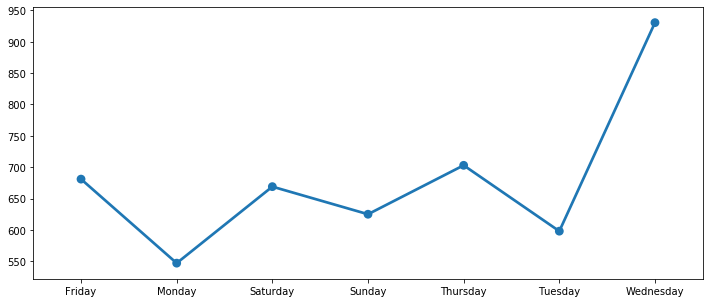

In [59]:
df_train_agg = taxiSample.groupby('pickup_weekday')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,5))
sns.pointplot(df_train_agg.pickup_weekday.values, df_train_agg.trip_duration.values)
plt.show()

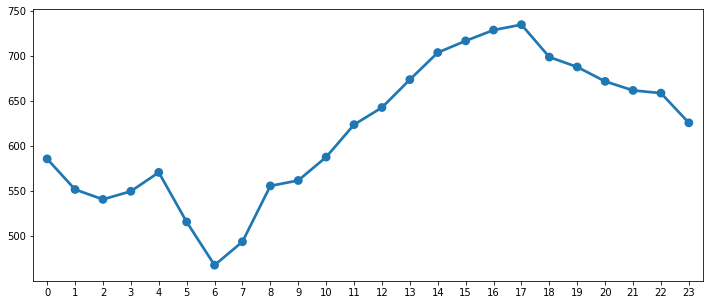

In [42]:
df_train_agg = taxiSample.groupby('pickup_hour')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,5))
sns.pointplot(df_train_agg.pickup_hour.values, df_train_agg.trip_duration.values)
plt.show()

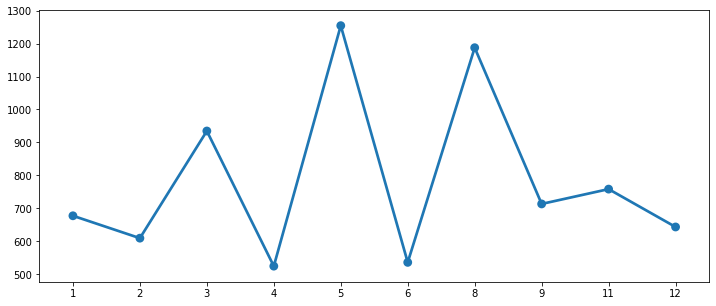

In [43]:
df_train_agg = taxiSample.groupby('pickup_month')['trip_duration'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,5))
sns.pointplot(df_train_agg.pickup_month.values, df_train_agg.trip_duration.values)
plt.show()